# Algorithme supervisé : Régression linéaire

In [9]:
#librairie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
import os

In [10]:
def import_table () : 
    """
    INPUT : path
    
    GOAL : This function ask the user to enter a rooth path for exploiting the dataset, return a pandas dataframe
    
    RETURN : The dataframe base
    
    """
    rooth = input("Veuillez rentrer un chemin de fichier: " )
    rooth = rooth + '/diamond_final.csv'
    diamond = pd.read_csv(rooth, index_col=0)
    return diamond

In [11]:
diamond = import_table()
diamond

Veuillez rentrer un chemin de fichier: C:\Users\ngkha\Desktop\Diamonds\Data


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,1,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,1,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,5,7,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut','color','clarity']
# Pipeline to transform our dataset
pipeline = ColumnTransformer([
    ("num", RobustScaler(), continuous_features), # Perform feaured scaling on numeric attributes
    ("cat", OneHotEncoder(), categorical_features) # Perform One-Hot encoding on the category attributes
])
# Split between X and Y
X = diamond.drop(labels='price',axis=1)
X = pipeline.fit_transform(X)
y = diamond['price']

# Split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [13]:
mae_list = []
rmse_list = []
rsquare_list = []
regressor = []


In [14]:
def modeling (model) :
    """
    GOAL : This function implement a regression linear model and return its results
    
    RETURN : Model's performances, with linear regression coefficients and a plot of difference between y_test 
    and y_predict
    
    """
    print('R2:',model.score(X_train, y_train))
    
    y_pred = model.predict(X_test)
    
    # Evaluating the model
    plt.scatter(y_test,y_pred)
    plt.xlabel('True Values [price]')
    plt.ylabel('Predictions [price]')
    plt.axis('equal')
    plt.axis('square')
    
    Rsquare=model.score(X_test,y_test)
    rsquare_list.append(Rsquare)
    print("Rsquare: %f" %(Rsquare))
    mae = metrics.mean_absolute_error(y_test,y_pred)
    mae_list.append(mae)
    print("mae: %f" %(mae))
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    rmse_list.append(rmse)
    print("rmse: %f" %(rmse))

R2: 0.9200263903294313
Rsquare: 0.918501
mae: 746.906230
rmse: 1139.374331
R2: 0.9973625931959024
Rsquare: 0.981376
mae: 273.521556
rmse: 544.663358
R2: 0.9744619741669253
Rsquare: 0.972377
mae: 397.307471
rmse: 663.326394


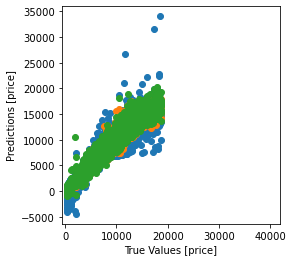

In [15]:
# Modeling
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
modeling(lr)
regressor.append("Linear regressor")

rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
modeling(rf)
regressor.append("Random forest regressor")

from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(max_depth = 2, n_estimators=100,learning_rate=1.0)
grad_reg.fit(X_train,y_train)
modeling(grad_reg)
regressor.append("Gradient boosting regressor")

In [16]:
t  = PrettyTable(["Model","MAE","RMSE","R_square"])
for i in range(len(regressor)):
  t.add_row([regressor[i],round(mae_list[i],2),round(rmse_list[i],2),round(rsquare_list[i],2)])
print(t)

+-----------------------------+--------+---------+----------+
|            Model            |  MAE   |   RMSE  | R_square |
+-----------------------------+--------+---------+----------+
|       Linear regressor      | 746.91 | 1139.37 |   0.92   |
|   Random forest regressor   | 273.52 |  544.66 |   0.98   |
| Gradient boosting regressor | 397.31 |  663.33 |   0.97   |
+-----------------------------+--------+---------+----------+


Random-Forest gives us the highest R2-Score : 98%  so this is the best supervised model for our prediction